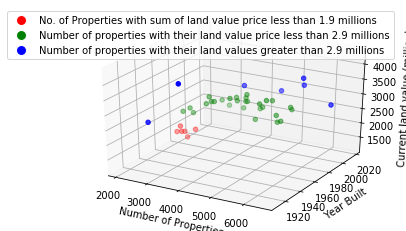

In [3]:
'''
==============
3D scatterplot
==============
Demonstration of a basic scatterplot in 3D.
'''

# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('property_tax_report.csv')

# Extract the columns and do some transformations
yearWiseAgg = data[['PID','CURRENT_LAND_VALUE']].groupby(data['YEAR_BUILT']).agg({'PID':'count','CURRENT_LAND_VALUE':'sum'})
yearWiseAgg = yearWiseAgg.reset_index().dropna()

# Define colors as red, green, blue
colors = ['r', 'g', 'b']

# Get only records which have more than 2000 properties built per year
morethan2k = yearWiseAgg.query('PID>2000')

# Get shape of dataframe
dflen = morethan2k.shape[0]

# Fetch land values from dataframe
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()

# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)

# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')

plt.show()

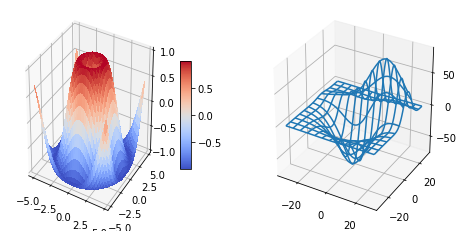

In [4]:

'''
====================
3D plots as subplots
====================
Demonstrate including 3D plots as subplots.
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# Get equally spaced numbers with interval of 0.25 from -5 to 5
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
# Convert it into meshgrid for plotting purpose using x and y
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
# Return a tuple X, Y, Z with a test data set
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

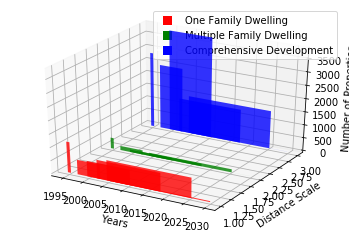

In [6]:

"""
========================================
Create 2D bar graphs in different planes
========================================
Demonstrates making a 3D plot which has 2D bar graphs projected onto
planes y=0, y=1, etc.
"""

# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('property_tax_report.csv')

# Groupby Zone catrgory and Year built to seperate for each zone
newdata = data.groupby(['YEAR_BUILT','ZONE_CATEGORY']).agg('count').reset_index()

# Create list of years that are found in all zones that we want to plot
years = [1995,2000,2005,2010,2015,2018]

# Create list of Zone categoreis that we want to plot
categories = ['One Family Dwelling', 'Multiple Family Dwelling', 'Comprehensive Development']

# Plot bar plot for each category
for cat,z,c in zip(categories,[1,2,3],['r','g','b']):
    category = newdata[(newdata['ZONE_CATEGORY']==cat) & (newdata['YEAR_BUILT'].isin(years))]
    ax.bar(category['YEAR_BUILT'], category['PID'],zs=z, zdir='y', color=c, alpha=0.8)
    
# Set labels
ax.set_xlabel('Years')
ax.set_ylabel('Distance Scale')
ax.set_zlabel('Number of Properties')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='s', color='w', label='One Family Dwelling',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='Multiple Family Dwelling',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Comprehensive Development',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')

plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


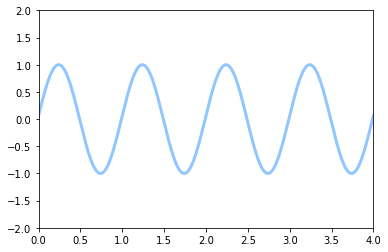

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

## 3D 플롯해보기

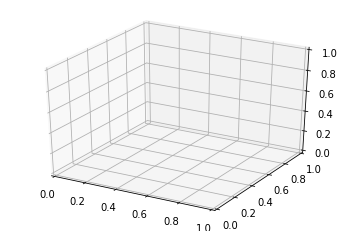

In [12]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()


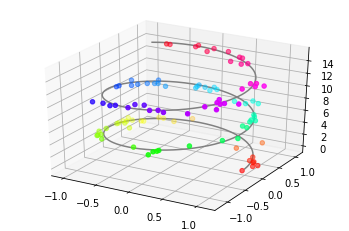

In [13]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

In [14]:
import gi
gi.require_version('Gtk', '3.0')
from gi.repository import Gtk

from matplotlib.figure import Figure
from matplotlib.backends.backend_gtk3agg import FigureCanvas
from matplotlib.backends.backend_gtk3 import (
    NavigationToolbar2GTK3 as NavigationToolbar)

win = Gtk.Window()
win.connect("destroy", lambda x: Gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = Gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a Gtk.DrawingArea
vbox.pack_start(canvas, True, True, 0)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False, 0)

win.show_all()
Gtk.main()

ModuleNotFoundError: No module named 'gi'

In [15]:
pip install gi

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement gi (from versions: none)
ERROR: No matching distribution found for gi


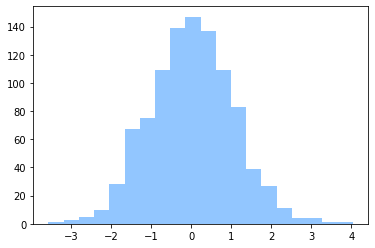

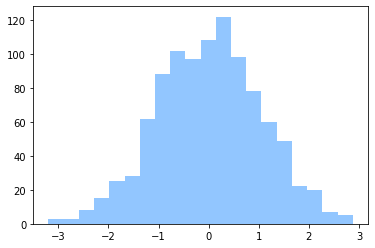


Time taken by the plain vanilla for-loop
----------------------------------------------
999.9275207519531 us

Time taken by list comprehension and zip
----------------------------------------
753 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Time taken by map function
----------------------------------------
661 µs ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Time taken by numpy.vectorize method
----------------------------------------
343 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
import numpy as np
from math import sin as sn
import matplotlib.pyplot as plt
import time
# Number of test points
N_point  = 1000
# Define a custom function with some if-else loops
def myfunc(x,y):
    if (x>0.5*y and y<0.3):
        return (sn(x-y))
    elif (x<0.5*y):
        return 0
    elif (x>0.2*y):
        return (2*sn(x+2*y))
    else:
        return (sn(y+x))
# List of stored elements, generated from a Normal distribution
lst_x = np.random.randn(N_point)
lst_y = np.random.randn(N_point)
lst_result = []
# Optional plots of the data
plt.hist(lst_x,bins=20)
plt.show()
plt.hist(lst_y,bins=20)
plt.show()
# First, plain vanilla for-loop
t1=time.time()
for i in range(len(lst_x)):
    x = lst_x[i]
    y= lst_y[i]
    if (x>0.5*y and y<0.3):
        lst_result.append(sn(x-y))
    elif (x<0.5*y):
        lst_result.append(0)
    elif (x>0.2*y):
        lst_result.append(2*sn(x+2*y))
    else:
        lst_result.append(sn(y+x))
t2=time.time()
print("\nTime taken by the plain vanilla for-loop\n----------------------------------------------\n{} us".format(1000000*(t2-t1)))
# List comprehension
print("\nTime taken by list comprehension and zip\n"+'-'*40)
%timeit lst_result = [myfunc(x,y) for x,y in zip(lst_x,lst_y)]
# Map() function
print("\nTime taken by map function\n"+'-'*40)
%timeit list(map(myfunc,lst_x,lst_y))
# Numpy.vectorize method
print("\nTime taken by numpy.vectorize method\n"+'-'*40)
vectfunc = np.vectorize(myfunc,otypes=[np.float],cache=False)
%timeit list(vectfunc(lst_x,lst_y))
